# Постановка задачи
Существуют общепринятая система поставок оборудования по цепочке: заказчик-поставщик-завод. Иногда поставщик и завод могут быть представлены одной компанией. 
Обязательным условием договора между компаниями является указание в нем срока поставки закупаемого оборудования. Нарушение данного срока согласно условиям договора ведет в последующем к предъявлению претензии конечного заказчика к поставщику. Зачастую штрафные санкции превышают рентабельность поставщика и сделка становится убыточной.
В связи с этим, поставщику необходимо на стадии подписании договора или предоставлении оферты на тендере понимать на сколько завод может сорвать срок поставки оборудования. Далее можно заложить данную дельту в пункт договора.

В данном исследовании мы будем в лице поставщика, данные выгружены из 1С Бухгалтерии. Наименования компаний(юридичиских лиц) и другая коммерческая информация в данном исследовании не используется.    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [10]:
df = pd.read_excel('Dataset_PG.xlsx')

Данные подготавливались в Excel, т.к. экспорт данных из 1С Бухгалтерии в Excel более удобен. Выгрузка сделана за последние 5 лет.

In [12]:
df

,id,spec,equipment,type,delivery_time_theory,delivery_time_fact,order_date
0,1,33,Щит управления вентиляцией комплектный в сборе...,НКУ,75,75,2016-10-26
1,2,1,Подстанция трансформаторная комплектная 2КТП 1...,КТП,90,112,2017-01-20
2,3,50,Шкаф управления ШГЕ-3 (Ш9113-А574ХЛ1),НКУ,80,80,2017-05-25
3,4,52,Шкаф управления ШГЕ-3 (Ш9113-А574ХЛ1),НКУ,80,125,2017-09-29
4,5,53,Шкаф управления ШГЕ-3 (Ш9113-А574ХЛ1),НКУ,80,121,2017-10-03
...,...,...,...,...,...,...,...
102,103,123,Устройство автоматическое фильтрокомпенсирующе...,УКРМ,120,107,2021-06-30
103,104,124,1ХКТПБ121В66301С06Т-А1Б1Е1П1Р1С1Т1У1,КТП,85,175,2021-08-23
104,105,125,КТП(ВВ) 2500/10/6 УХЛ1,КТП,120,131,2021-09-01
105,106,125,Подстанция трансформаторная комплектная КТПН-4...,КТП,85,150,2021-09-01


* id - внутренний индификатор данных, который не нужен и в последствии будет удален
* spec - номер спецификации между контрагентами. Введен для удобства поиска конкретных спецификаций с выбросами данных (если такие обнаружатся)
* equipment - наименование оборудования согласно спецификации
* type - тип оборудования, который может влиять на срыв поставки (если такая зависимость обнаружится, будет объясненно почему)
* delivery_time_theory - срок поставки с момента подписания спецификации контрагентами
* delivery_time_fact - фактический срок поставки с момента подписания спецификации контрагентами. Чаще всего больше значения delivery_time_theory, но бывали и досрочные поставки
* order_date - дата подсписания спецификации контрагентами. Считается фактической датой размещения заказа.

# Проверка данных, добавление необходимых столбцов

In [13]:
pd.isnull(df).any()

id                      False
spec                    False
equipment               False
type                    False
delivery_time_theory    False
delivery_time_fact      False
order_date              False
dtype: bool

Пропуски данных отсутвуют. Т.к. датасэт небольшой, то пропуски были проверены при экспортировании из 1С.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    107 non-null    int64         
 1   spec                  107 non-null    int64         
 2   equipment             107 non-null    object        
 3   type                  107 non-null    object        
 4   delivery_time_theory  107 non-null    int64         
 5   delivery_time_fact    107 non-null    int64         
 6   order_date            107 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.0+ KB


Как видим из отчета, данные нам подходят. Однако у нас отсутсвует информация о просрочке в нашем датафрэйме, поэтому добавим с помощью математического действия:

In [15]:
df = df.assign(delta = df.delivery_time_fact - df.delivery_time_theory)

# Визуализация

Text(0.5, 0, 'Срок поставки, заявивший завод')

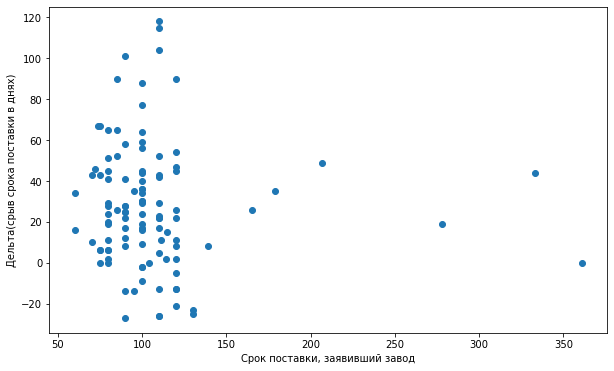

In [27]:
plt.figure(figsize=(10,6))
plt.scatter( df.delivery_time_theory, df.delta)
plt.ylabel('Дельта(срыв срока поставки в днях)')
plt.xlabel('Срок поставки, заявивший завод')

# Модель

In [25]:
model = LinearRegression()

In [28]:
x = pd.DataFrame(df.delivery_time_theory)
y = pd.DataFrame(df.delta)

In [29]:
model.fit(x,y)

LinearRegression()

In [30]:
model.coef_

array([[-0.04590473]])

In [31]:
model.intercept_

array([32.39493589])

Text(0.5, 0, 'Срок поставки, заявивший завод')

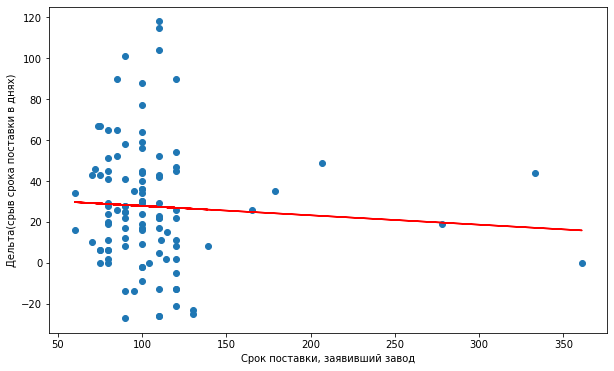

In [33]:
plt.figure(figsize=(10,6))
plt.scatter( df.delivery_time_theory, df.delta)
plt.plot(x, model.predict(x), color = 'red')
plt.ylabel('Дельта(срыв срока поставки в днях)')
plt.xlabel('Срок поставки, заявивший завод')


In [34]:
model.score(x,y)

0.00428725463923163

Коэффициент детерминации близок к нулю. Это говорит о том, что срыв срока поставки не обусловлен влиянием от теоретического срока поставки? 

In [38]:
model.predict([[60]])

array([[29.64065195]])

# Заметки

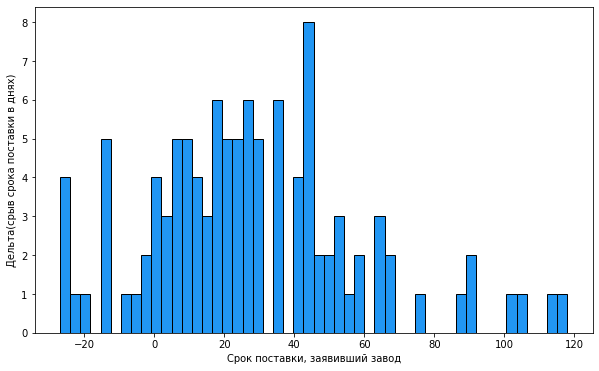

In [46]:
plt.figure(figsize=(10,6))
plt.hist(df['delta'], bins=50, ec='black', color='#2196f3')
plt.ylabel('Дельта(срыв срока поставки в днях)')
plt.xlabel('Срок поставки, заявивший завод')
plt.show()

In [47]:
df.corr()

,id,spec,delivery_time_theory,delivery_time_fact,delta
id,1.000000,0.956335,0.157336,0.187807,0.092511
spec,0.956335,1.000000,0.176028,0.202780,0.091114
delivery_time_theory,0.157336,0.176028,1.000000,0.806443,-0.065477
delivery_time_fact,0.187807,0.202780,0.806443,1.000000,0.537240
delta,0.092511,0.091114,-0.065477,0.537240,1.000000
